In [1]:
import pandas as pd
import uproot
import copy
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.colors import LogNorm
import numpy as np


In [2]:
#400 amev
fname = "carbon_target_2198_400amev_run_0183_0001"
#fname = "carbon_target_1086_400amev_run_0181_0001"
#fname = "carbon_target_54_400amev_run_0179_0001"
#fname = "empty_target_2198_400amev_run_0187_0001"
#550 amev
#fname = "carbon_target_2198_550amev_run_0103_0001"
#fname = "carbon_target_1086_550amev_run_0101_0001"
#fname = "carbon_target_54_550amev_run_0099_0001"
#fname = "empty_target_2198_550amev_run_0096_0001"
#650 amev
#fname = "carbon_target_2198_650amev_run_0130_0001"
#fname = "carbon_target_1086_650amev_run_0127_0001"
#fname = "carbon_target_54_650amev_run_0126_0001"
#fname = "empty_target_2198_650amev_run_0124_0001"
#800 amev
#fname = "carbon_target_2198_800amev_run_0170_0001"
#fname= "carbon_target_1086_800amev_run_0168_0001"
#fname= "carbon_target_54_800amev_run_0166_0001"
#fname = "empty_target_2198_800amev_run_0173_0001"


#file = uproot.open("/home/tobiasjenegger/some_rootfiles/carbon_target_2198_400amev_run_0183_0001.root")
file = uproot.open("/home/tobiasjenegger/some_rootfiles/"+fname+".root")
#open tree
tree = file["points"] 
df = tree.arrays(library="pd") 
#A LITTLE BIT DANGEROUS,smooth out df['x']
sigma_x = 0.7
#df['x'] = df['x'] + np.random.normal(loc=0, scale=sigma_x, size=len(df))

### first plot y distribution

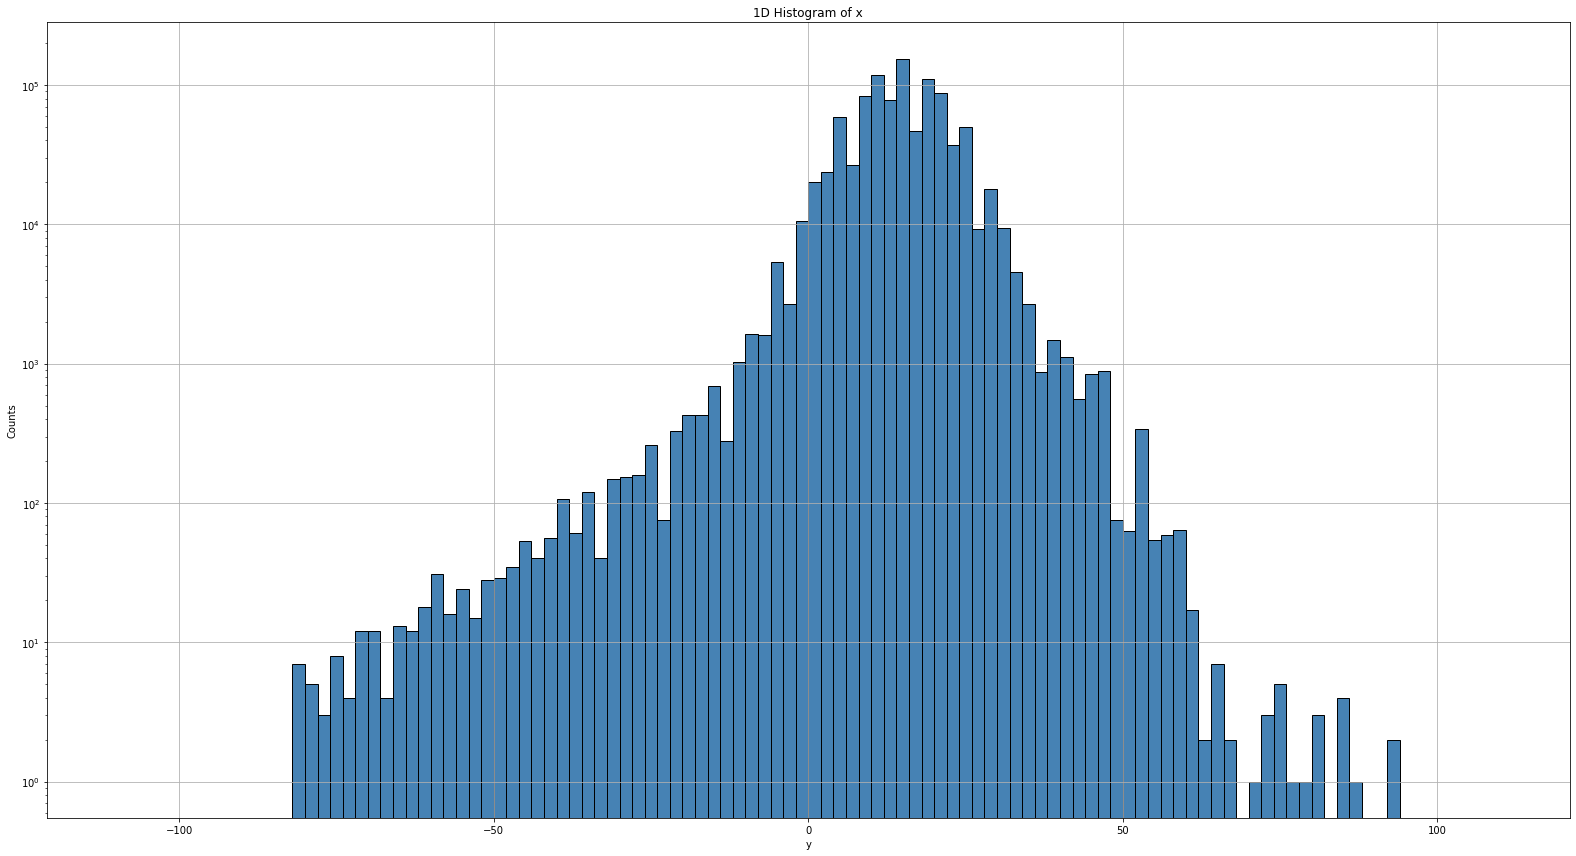

In [3]:
plt.figure(figsize=(22, 12))
plt.hist(df["y"], bins=110, range=(-110, 110), color='steelblue', edgecolor='black')
plt.xlabel("y")
plt.yscale("log")
plt.ylabel("Counts")
plt.title("1D Histogram of x")
plt.grid(True)
plt.tight_layout()
plt.show()


zero crossings
[ 3  4 28]

zero crossings
[27]

zero crossings
[22]

zero crossings
[21]

zero crossings
[20]

zero crossings
[19]

zero crossings
[18]

zero crossings
[17]

zero crossings
[]

zero crossings
[]

zero crossings
[]


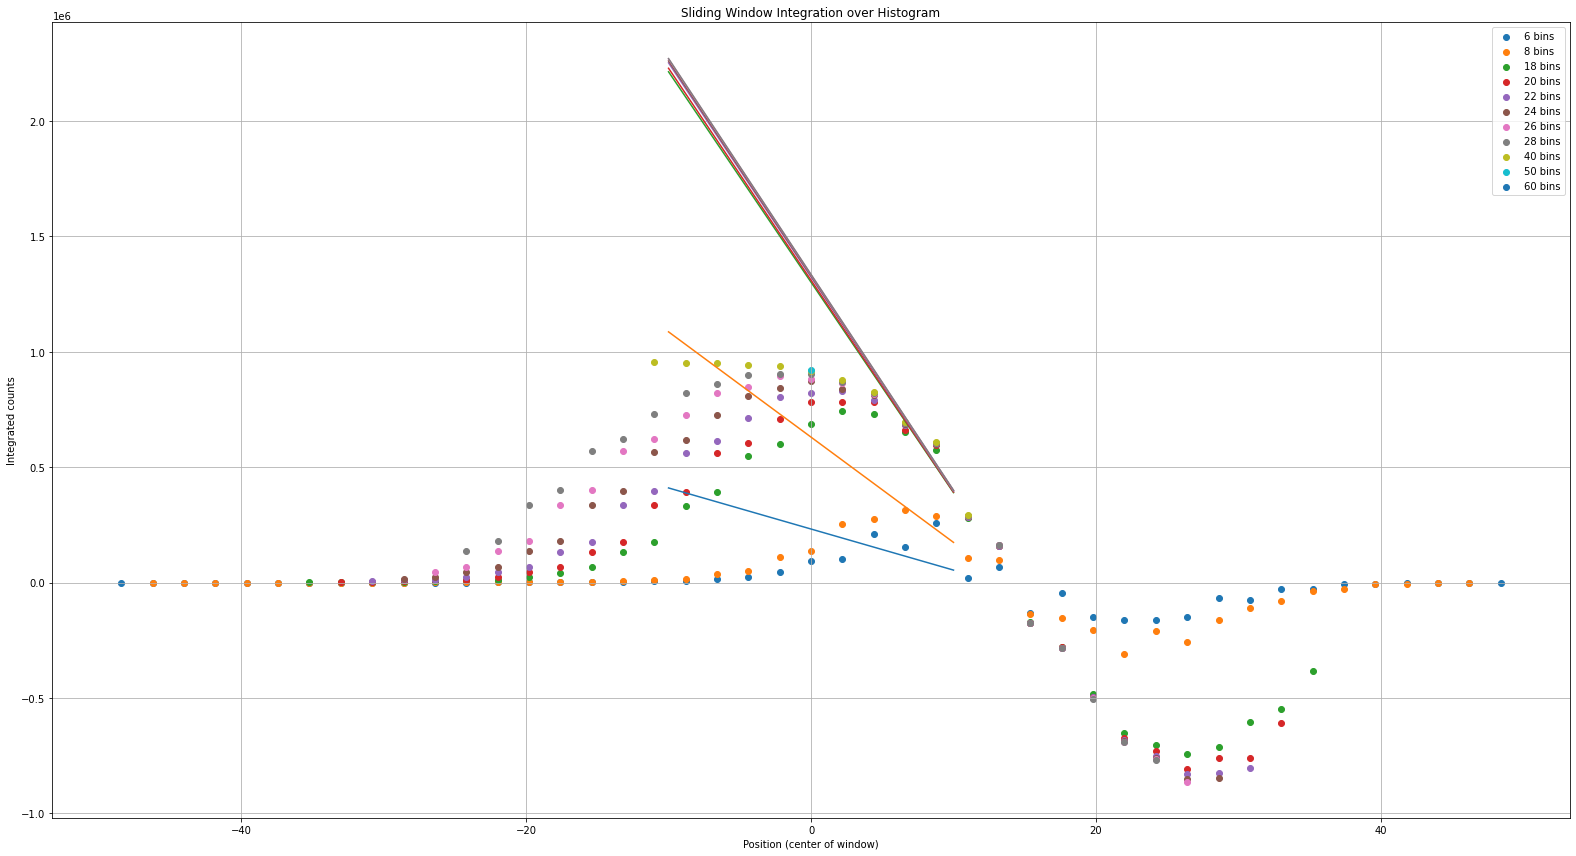

In [4]:
arr_middle_int_points = []
arr_integral_window = []
plt.figure(figsize=(22, 12))

# Create histogram
counts, bin_edges = np.histogram(df["y"], bins=50, range=(-55, 55))

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_width = bin_edges[1] - bin_edges[0]

# Set window size
#window_size = 20
window_sizes = [6,8,18, 20, 22, 24,26,28,40,50,60]
#window_sizes = [6,8]

for window_size in window_sizes:
    # Integrate over sliding window
    integrals = []
    positions = []

    for i in range(len(counts) - window_size + 1):
        window_counts = counts[i:i+window_size]

        integral = np.sum(window_counts[int(window_size/2):]) - np.sum(window_counts[0:int(window_size/2)])
        integrals.append(integral)
        # Store the center of the window for reference
        center_position = np.mean(bin_centers[i:i+window_size])
        #print("bin centers to consider:\t",bin_centers[i:i+window_size] )
        #print("these center_position", center_position)
        positions.append(center_position)
    plt.scatter(positions, integrals, label=f'{window_size} bins')
    #plt.yscale('log')
    
    #print("WINDOW SIZE:\t",window_size)
    zero_crossings = np.where(np.diff(np.sign(integrals)))[0]
    print()
    #print("----------------")
    #print("positions shape:",len(positions))
    #print("bin_centers shape",bin_centers.shape)
    #print("zero_crossings shape",zero_crossings.shape)
    #print("integral shape",len(integrals))
    
    print("zero crossings")
    print(zero_crossings)
    #print(integrals[110])
    #print(bin_centers[110])
    #print("and this prints the positions")
    #print(positions[110])
    filtered = zero_crossings[(zero_crossings >=10)]
    #print(filtered)
    if (filtered.shape[0] > 0):
        #print(filtered[0])
        x_fit = positions[filtered[0]-1:filtered[0]+3]
        y_fit = integrals[filtered[0]-1:filtered[0]+3]
        #print("x-y")
        #print(x_fit)
        #print(y_fit)
        coeffs = np.polyfit(x_fit, y_fit, deg=1)
        m, b = coeffs
        #print(f"Slope (m): {m}")
        #print(f"Intercept (b): {b}")
        
        if m != 0:
            x_at_y0 = -b / m
            #print(f"x where y = 0: {x_at_y0}")
            arr_middle_int_points.append(x_at_y0)
            arr_integral_window.append(window_size)
            fx = np.linspace(-10,10)
            fy = m*fx+b
            plt.plot(fx,fy)
            
        else:
            print("The fit is horizontal (slope = 0), so y never crosses 0.")
        

    

# Finalize plot
plt.xlabel('Position (center of window)')
plt.ylabel('Integrated counts')
plt.title('Sliding Window Integration over Histogram')
#plt.plot(-2, 0, marker='o', color='red', label='Point (-2, 0)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show() 

In [5]:
print(arr_middle_int_points)
mean_val_mw1_x = arr_middle_int_points[2] + 1 #best: arr_middle_int_points[0] + 0.25
print(mean_val_mw1_x)
df['y_symmetric'] = df['y'].apply(lambda x: 2 * mean_val_mw1_x - x if x < mean_val_mw1_x else pd.NA)

[13.04608103026299, 13.820934951901345, 14.276569050110314, 14.273652069996219, 14.270273869987603, 14.271494711649042, 14.272645734250268, 14.277179388853622]
15.276569050110314


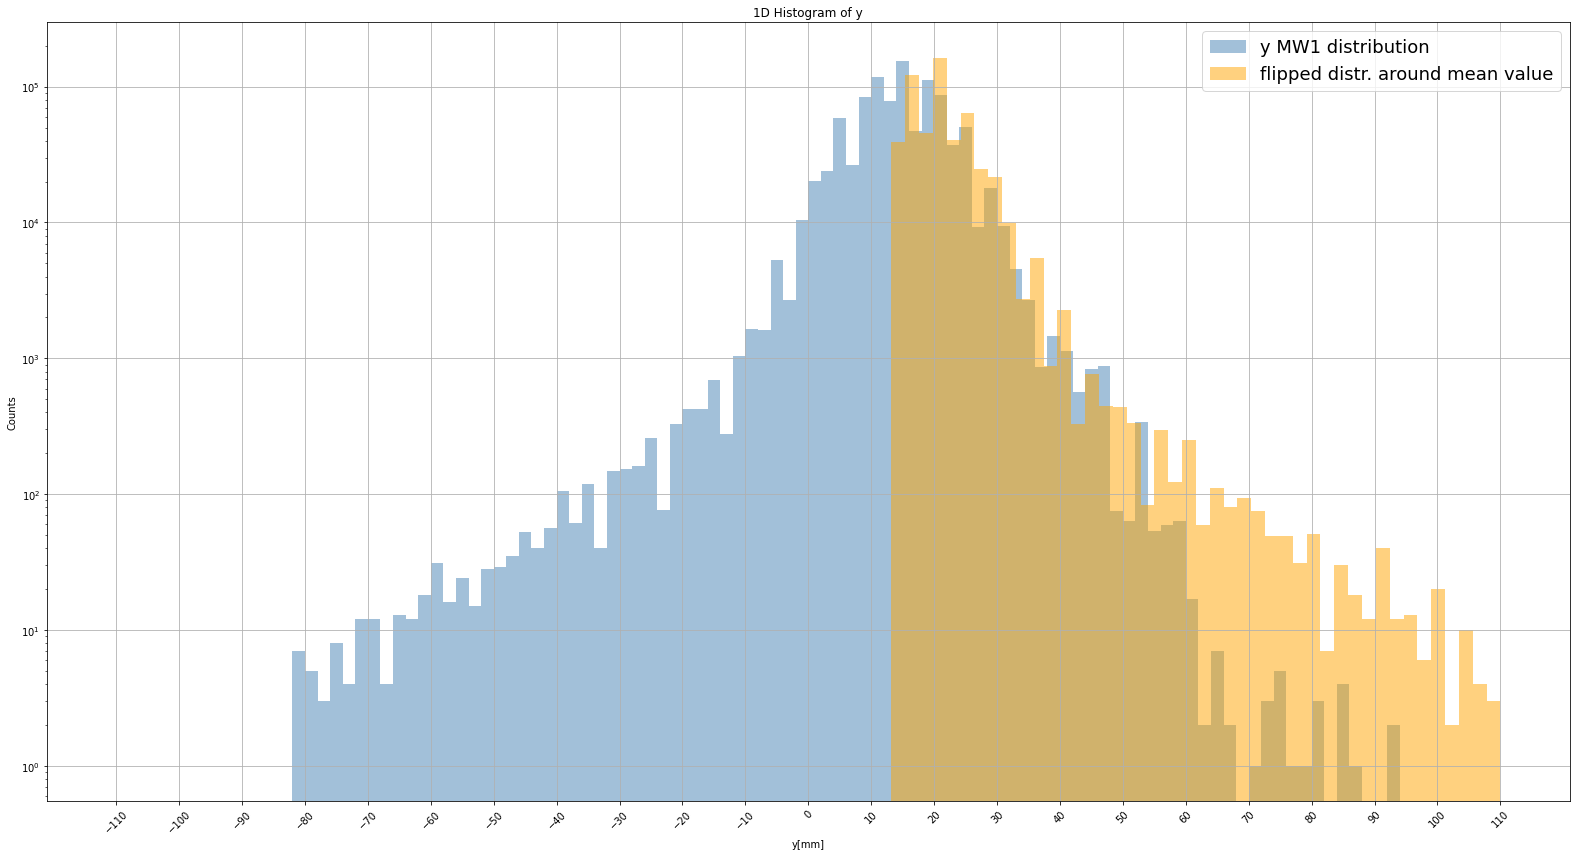

In [6]:
ticks = np.arange(-110, 110 + 0.5, 10)

plt.figure(figsize=(22, 12))
plt.hist(df["y"], bins=110, range=(-110, 110), color='steelblue',alpha=0.5,label="y MW1 distribution")
plt.hist(df["y_symmetric"].dropna(), bins=100, range=(-110, 110), color='orange',alpha=0.5,label="flipped distr. around mean value")
plt.xlabel("y[mm]")
plt.yscale("log")
plt.ylabel("Counts")
plt.title("1D Histogram of y")
plt.xticks(ticks, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=18)
#plt.show()
plt.savefig("mw1_y_distr_flipped.png",dpi=300)

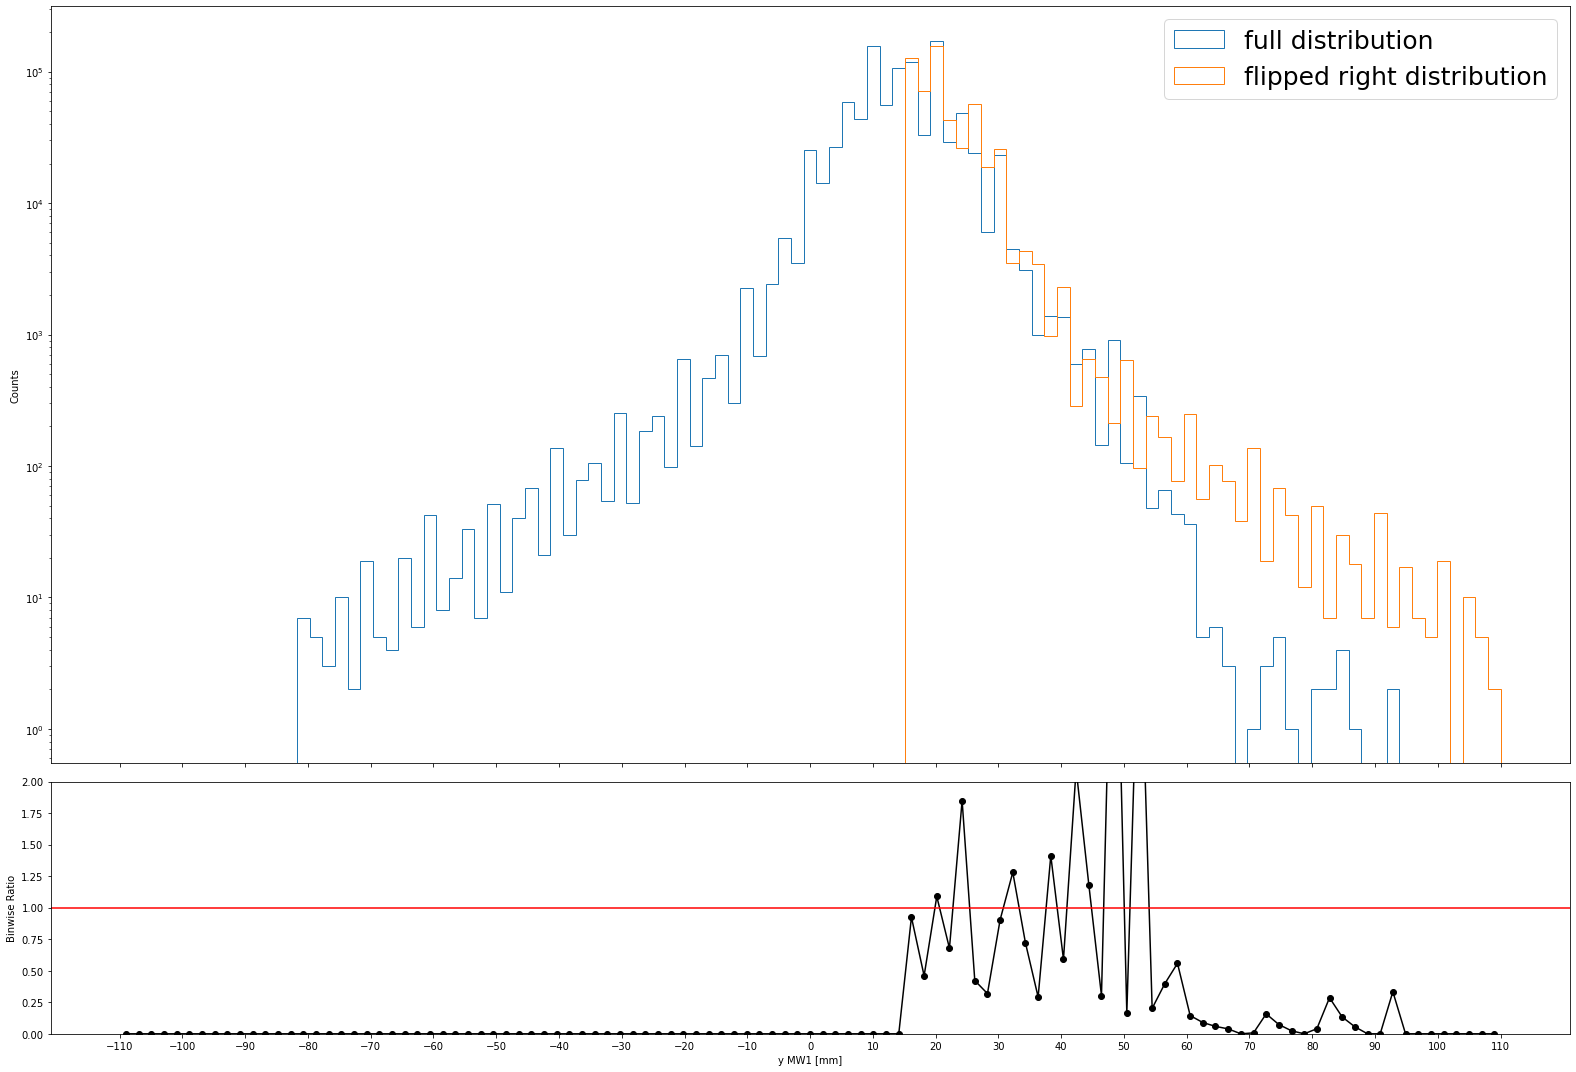

In [7]:
ticks = np.arange(-110, 110 + 0.5, 10)

# Define shared bins
bins = np.linspace(-110, 110, 110)

# Compute histograms for selected column
hist1, bin_edges = np.histogram(df['y'], bins=bins)
hist2, _ = np.histogram(df['y_symmetric'].dropna(), bins=bins)


nonzero_indices = np.nonzero(hist2)[0]
if len(nonzero_indices) > 0:
    last_nonzero_idx = nonzero_indices[-1]
    hist2[last_nonzero_idx] = 0 

# Compute bin centers
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])


#Calculate errror bars...
#hist1 = hist1.astype(float)
#hist2 = hist2.astype(float)

# Calculate ratio safely
with np.errstate(divide='ignore', invalid='ignore'):
    ratio = np.true_divide(hist1, hist2)
    ratio[~np.isfinite(ratio)] = 0  # Replace NaN, inf
arr_ratio = copy.deepcopy(ratio[ratio != 0])
#    # Error propagation
#    error = np.zeros_like(ratio)
#    mask = (hist1 > 0) & (hist2 > 0)
#    error[mask] = ratio[mask] * np.sqrt(1/hist1[mask] + 1/hist2[mask])
    
# Calculate ratio as histo
#with np.errstate(divide='ignore', invalid='ignore'):
#    ratio = np.true_divide(hist1, hist2)
#    # Set ratio to 0 where hist2 is 0
#    ratio[hist2 == 0] = 0
#
#    # Error propagation
#    error = np.zeros_like(ratio)
#    mask = (hist1 > 0) & (hist2 > 0)
#    error[mask] = ratio[mask] * np.sqrt(1/hist1[mask] + 1/hist2[mask])

    

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,
                               gridspec_kw={'height_ratios': [3, 1]},
                               figsize=(22, 15))

# Histogram plots
ax1.hist(df['y'], bins=bins, histtype='step', label='full distribution')
ax1.hist(df['y_symmetric'].dropna(), bins=bins, histtype='step', label='flipped right distribution')
ax1.legend(fontsize=18)
ax1.set_ylabel('Counts')
ax1.set_yscale('log')
ax1.set_xticks(ticks)

# Ratio plot

ax2.plot(bin_centers, ratio, marker='o', linestyle='solid', color='black') ## original one
#ax2.errorbar(bin_centers, ratio, yerr=error, fmt='o', label='Ratio with error bars',color='black')
#ax2.hist(ratio, bins=bins, edgecolor='black')
ax2.set_ylabel('Binwise Ratio')
ax2.set_xlabel('y MW1 [mm]')
ax2.set_ylim(0, 2)
ax2.set_xticks(ticks)
ax2.axhline(y=1, color='r', linestyle='-')

ax1.legend(fontsize=25)
plt.tight_layout()
plt.savefig("mw1_y_distr_flipped_and_bin_ratio_"+fname+".png",dpi=300)
plt.show()


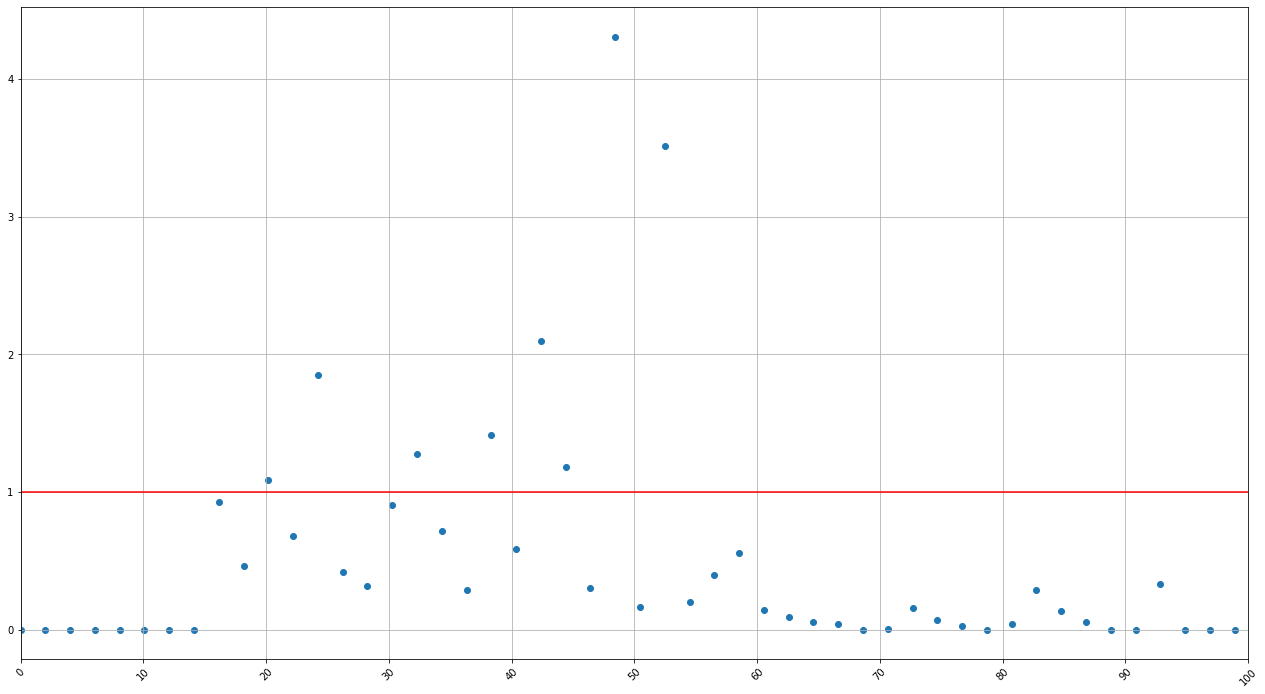

In [8]:
bins = np.linspace(-110, 110, 110)
#print(bins.shape)
#print(bins)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.figure(figsize=(22, 12))
ticks = np.arange(-110, 110 + 0.5, 10)
plt.xticks(ticks, rotation=45)
#plt.bar(bin_centers,ratio,edgecolor="black") #original
plt.scatter(bin_centers,ratio)
plt.axhline(y=1, color='r', linestyle='-')
plt.xlim((0,100))
plt.grid()
plt.savefig("zoomed_binwise_ratio.png",dpi=300)

In [9]:
for i in range(len(ratio)):
    print("[",i,",",bin_centers[i],",",ratio[i],"]")


[ 0 , -108.99082568807339 , 0.0 ]
[ 1 , -106.97247706422019 , 0.0 ]
[ 2 , -104.95412844036697 , 0.0 ]
[ 3 , -102.93577981651376 , 0.0 ]
[ 4 , -100.91743119266056 , 0.0 ]
[ 5 , -98.89908256880733 , 0.0 ]
[ 6 , -96.88073394495413 , 0.0 ]
[ 7 , -94.86238532110092 , 0.0 ]
[ 8 , -92.8440366972477 , 0.0 ]
[ 9 , -90.8256880733945 , 0.0 ]
[ 10 , -88.80733944954129 , 0.0 ]
[ 11 , -86.78899082568807 , 0.0 ]
[ 12 , -84.77064220183486 , 0.0 ]
[ 13 , -82.75229357798165 , 0.0 ]
[ 14 , -80.73394495412845 , 0.0 ]
[ 15 , -78.71559633027523 , 0.0 ]
[ 16 , -76.69724770642202 , 0.0 ]
[ 17 , -74.6788990825688 , 0.0 ]
[ 18 , -72.66055045871559 , 0.0 ]
[ 19 , -70.64220183486239 , 0.0 ]
[ 20 , -68.62385321100918 , 0.0 ]
[ 21 , -66.60550458715596 , 0.0 ]
[ 22 , -64.58715596330276 , 0.0 ]
[ 23 , -62.56880733944954 , 0.0 ]
[ 24 , -60.550458715596335 , 0.0 ]
[ 25 , -58.53211009174312 , 0.0 ]
[ 26 , -56.51376146788991 , 0.0 ]
[ 27 , -54.4954128440367 , 0.0 ]
[ 28 , -52.47706422018349 , 0.0 ]
[ 29 , -50.45871559633

In [10]:
## now calculate factor:
def corr_factor_finder(dframe,cut_val):
    integral_x = (dframe["y"] > cut_val).sum()
    integral_mirror = (dframe['y_symmetric'] > cut_val).sum()
    diff_integral = integral_mirror - integral_x
    corr_factor = 1+(float(diff_integral)/len(dframe["y"]))
    return diff_integral,corr_factor
    


print("MAXIMUM correction")
cut_val_max = 54.49541284403669 #54.49541284403669  # 50.458715596330265
diff_i,corr_f = corr_factor_finder(df,cut_val_max)
print(diff_i,corr_f)

print("MINIMUM correction")
cut_val_min = 60.55045871559632
diff_i,corr_f = corr_factor_finder(df,cut_val_min)
print(diff_i,corr_f)

MAXIMUM correction
1274 1.0013091762568451
MINIMUM correction
860 1.0008837453539143


In [11]:
arr_ratio[-40:-20].std()

0.5248262810648168

In [12]:
arr_ratio

array([0.92463693, 0.45963789, 1.08885141, 0.6784055 , 1.84878512,
       0.42230422, 0.31883292, 0.90375823, 1.28003408, 0.72024225,
       0.29180041, 1.41200407, 0.59009987, 2.09824561, 1.18320611,
       0.30252101, 4.30805687, 0.16380655, 3.51546392, 0.20168067,
       0.39759036, 0.55844156, 0.14457831, 0.08928571, 0.05882353,
       0.03896104, 0.00735294, 0.15789474, 0.07352941, 0.02380952,
       0.04      , 0.28571429, 0.13333333, 0.05555556, 0.33333333])

#### ok now I want to store things on text file
##### as mirror_mean,bin_left,bin_right, corr_min,corr_max

In [13]:
print(corr_factor_finder(df,cut_val_max))
print(corr_factor_finder(df,cut_val_min))
print(cut_val_min)
print(cut_val_max)
print(mean_val_mw1_x)
print(type(corr_factor_finder(df,cut_val_max)[1]))

(1274, 1.0013091762568451)
(860, 1.0008837453539143)
60.55045871559632
54.49541284403669
15.276569050110314
<class 'float'>


In [14]:
with open("y_corr_vals_"+ fname + ".txt", "w") as f:
    f.write("%s,%s,%s,%s,%s" % (cut_val_min, corr_factor_finder(df, cut_val_min)[1],cut_val_max,corr_factor_finder(df,cut_val_max)[1],mean_val_mw1_x))